In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import pickle
from tqdm import tqdm
import networkx as nx

In [2]:
import os
import psutil
from sklearn.metrics import roc_auc_score, average_precision_score, accuracy_score
from sklearn.metrics import precision_recall_curve
from IPython.display import clear_output
from tools.opera_tools import gen_x_y_dataset, plot_graphx
process = psutil.Process(os.getpid())

/home/vbelavin/home/anaconda3/envs/rootenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.14.5 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
%%time
graphx_list_train = []

for k in np.arange(0, 4):
    print(k)
    graphx_list_train.append(nx.read_gpickle('./data/brick_tenth_{}.pkl'.format(k)))

0
1
2
3
CPU times: user 42.3 s, sys: 14 s, total: 56.4 s
Wall time: 1min 5s


In [4]:
%%time
data = []
for graphx in graphx_list_train:
    X, y, node_ids = gen_x_y_dataset(graphx)
    print(len(y))
    X = np.array(X)
    y = np.array(y)
    data.append((X, y, node_ids))

652108
679668
540940
741010
CPU times: user 3min 24s, sys: 20 s, total: 3min 44s
Wall time: 3min 45s


In [5]:
X_train = np.concatenate([d[0] for d in data])
y_train = np.concatenate([d[1] for d in data])
node_ids_train = np.concatenate([d[2] for d in data])
y_train = (y_train >= 1).astype(int)

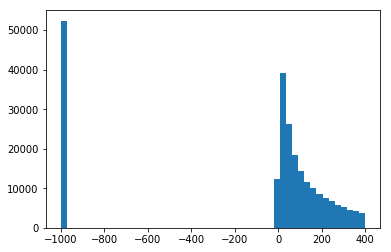

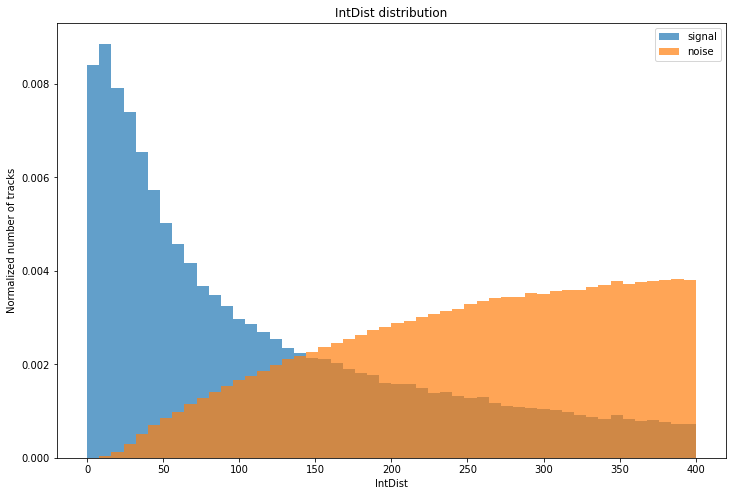

In [14]:
plt.figure(figsize=(12, 8))
plt.hist(X_train[:, 3][y_train==1], bins=50, range=(0, 400), density=True, alpha=0.7, label='signal');
plt.hist(X_train[:, 3][y_train==0], bins=50, range=(0, 400), density=True, alpha=0.7, label='noise');
plt.title('IntDist distribution')
plt.xlabel('IntDist')
plt.ylabel('Normalized number of tracks')
plt.legend()

Text(0.5,0,'Energy')

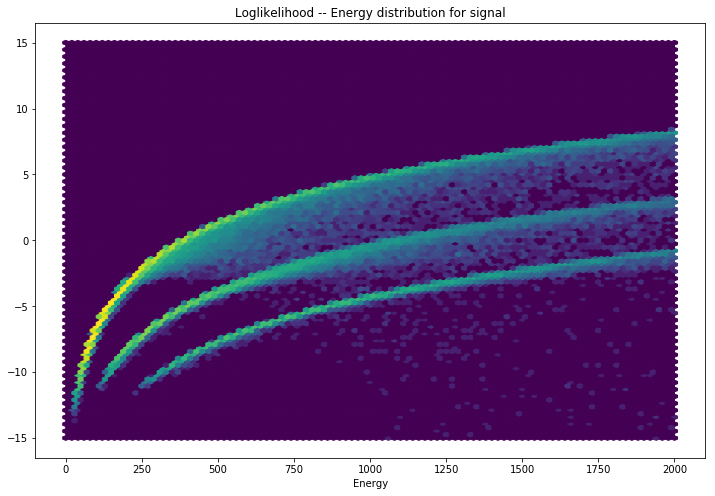

In [53]:
plt.figure(figsize=(12, 8))
plt.title('Loglikelihood -- Energy distribution for signal')
plt.hexbin(X_train[:, 4][y_train==1], X_train[:, 5][y_train==1],  extent=[0, 2000, -15, 15], bins='log')
plt.xlabel('Log-Likelihood')
plt.xlabel('Energy')

Text(0.5,0,'Energy')

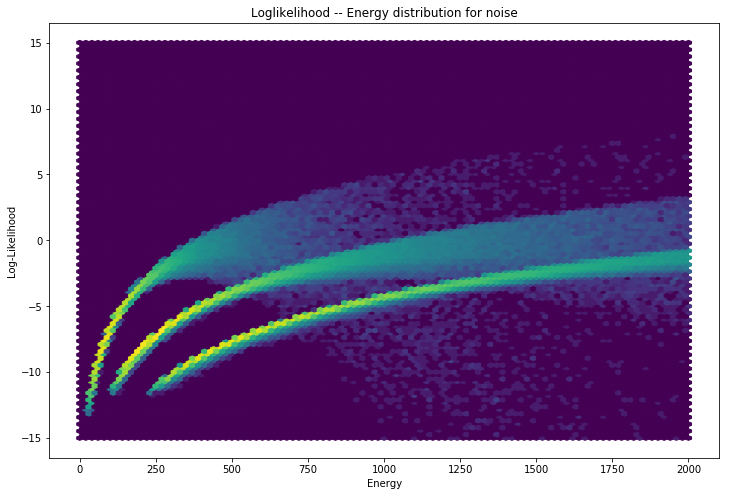

In [52]:
plt.figure(figsize=(12, 8))
plt.title('Loglikelihood -- Energy distribution for noise')
plt.hexbin(X_train[:, 4][y_train==0], X_train[:, 5][y_train==0],  extent=[0, 2000, -15, 15], bins='log')
plt.ylabel('Log-Likelihood')
plt.xlabel('Energy')

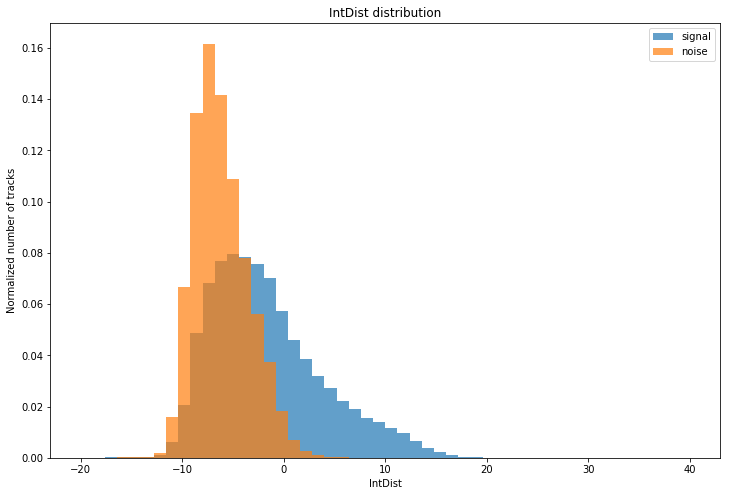

In [32]:
plt.figure(figsize=(12, 8))
plt.hist(X_train[:, 5][y_train==1], bins=50, range=(-20, 40), density=True, alpha=0.7, label='signal');
plt.hist(X_train[:, 5][y_train==0], bins=50, range=(-20, 40), density=True, alpha=0.7, label='noise');
plt.title('IntDist distribution')
plt.xlabel('IntDist')
plt.ylabel('Normalized number of tracks')
plt.legend()

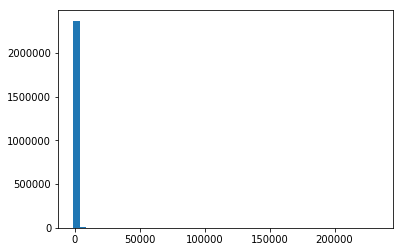

In [20]:
plt.hist(X_train[:, 4][y_train==0], bins=50, range=(0, 5000));

In [4]:
%%time
graphx_list_val = []

for k in np.arange(4, 7):
    print(k)
    graphx_list_val.append(nx.read_gpickle('./data/brick_tenth_{}.pkl'.format(k)))

4
5
6
CPU times: user 28.6 s, sys: 10.6 s, total: 39.2 s
Wall time: 39.3 s


In [5]:
%%time
data = []
for graphx in graphx_list_train:
    X, y, node_ids = gen_x_y_dataset(graphx)
    print(len(y))
    X = np.array(X)
    y = np.array(y)
    data.append((X, y, node_ids))

652108
679668
540940
741010
CPU times: user 3min 16s, sys: 17.2 s, total: 3min 33s
Wall time: 3min 35s


In [6]:
%%time
data_val = []
for graphx in graphx_list_val:
    X, y, node_ids = gen_x_y_dataset(graphx)
    print(len(y))
    X = np.array(X)
    y = np.array(y)
    data_val.append((X, y, node_ids))

748079
642662
645499
CPU times: user 2min 33s, sys: 12.6 s, total: 2min 46s
Wall time: 2min 47s


In [7]:
X_train = np.concatenate([d[0] for d in data])
y_train = np.concatenate([d[1] for d in data])
node_ids_train = np.concatenate([d[2] for d in data])
y_train = (y_train >= 1).astype(int)

In [8]:
len(y_train) / np.sum(y_train)

11.31801589191764

In [9]:
X_val = np.concatenate([d[0] for d in data_val])
y_val = np.concatenate([d[1] for d in data_val])
node_ids_val = np.concatenate([d[2] for d in data_val])
y_val = (y_val >= 1).astype(int)

In [10]:
len(y_val) / np.sum(y_val)

9.051444015238062

In [11]:
from xgboost import XGBClassifier

In [12]:
clf_xgb = XGBClassifier(silent=False, learning_rate=0.025, n_jobs=8,
                        max_depth=4, subsample=0.6, colsample_bytree=0.6,
                        n_estimators=5000, scale_pos_weight=10)
clf_xgb.fit(X=X_train, y=y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=30, verbose=True, eval_metric='auc');

[0]	validation_0-auc:0.968864
Will train until validation_0-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.970069
[2]	validation_0-auc:0.973538
[3]	validation_0-auc:0.974851
[4]	validation_0-auc:0.974789
[5]	validation_0-auc:0.98109
[6]	validation_0-auc:0.984413
[7]	validation_0-auc:0.984054
[8]	validation_0-auc:0.984051
[9]	validation_0-auc:0.984695
[10]	validation_0-auc:0.985859
[11]	validation_0-auc:0.985966
[12]	validation_0-auc:0.986019
[13]	validation_0-auc:0.986921
[14]	validation_0-auc:0.98671
[15]	validation_0-auc:0.987249
[16]	validation_0-auc:0.987122
[17]	validation_0-auc:0.98705
[18]	validation_0-auc:0.987028
[19]	validation_0-auc:0.986837
[20]	validation_0-auc:0.98682
[21]	validation_0-auc:0.986772
[22]	validation_0-auc:0.986624
[23]	validation_0-auc:0.986882
[24]	validation_0-auc:0.987314
[25]	validation_0-auc:0.987253
[26]	validation_0-auc:0.987161
[27]	validation_0-auc:0.987335
[28]	validation_0-auc:0.987247
[29]	validation_0-auc:0.987472
[30]	validation_0-au

[259]	validation_0-auc:0.992853
[260]	validation_0-auc:0.99286
[261]	validation_0-auc:0.99287
[262]	validation_0-auc:0.992876
[263]	validation_0-auc:0.992882
[264]	validation_0-auc:0.992887
[265]	validation_0-auc:0.992893
[266]	validation_0-auc:0.992898
[267]	validation_0-auc:0.992904
[268]	validation_0-auc:0.992905
[269]	validation_0-auc:0.992909
[270]	validation_0-auc:0.992915
[271]	validation_0-auc:0.992919
[272]	validation_0-auc:0.992927
[273]	validation_0-auc:0.992931
[274]	validation_0-auc:0.992938
[275]	validation_0-auc:0.992943
[276]	validation_0-auc:0.992949
[277]	validation_0-auc:0.992954
[278]	validation_0-auc:0.992962
[279]	validation_0-auc:0.992977
[280]	validation_0-auc:0.992985
[281]	validation_0-auc:0.992991
[282]	validation_0-auc:0.992995
[283]	validation_0-auc:0.992999
[284]	validation_0-auc:0.993002
[285]	validation_0-auc:0.993011
[286]	validation_0-auc:0.99302
[287]	validation_0-auc:0.993025
[288]	validation_0-auc:0.99303
[289]	validation_0-auc:0.993033
[290]	valida

[517]	validation_0-auc:0.993714
[518]	validation_0-auc:0.993715
[519]	validation_0-auc:0.993716
[520]	validation_0-auc:0.993716
[521]	validation_0-auc:0.993719
[522]	validation_0-auc:0.993722
[523]	validation_0-auc:0.993725
[524]	validation_0-auc:0.993726
[525]	validation_0-auc:0.993731
[526]	validation_0-auc:0.993732
[527]	validation_0-auc:0.993733
[528]	validation_0-auc:0.993734
[529]	validation_0-auc:0.993735
[530]	validation_0-auc:0.993736
[531]	validation_0-auc:0.993744
[532]	validation_0-auc:0.993747
[533]	validation_0-auc:0.993749
[534]	validation_0-auc:0.993751
[535]	validation_0-auc:0.993753
[536]	validation_0-auc:0.993755
[537]	validation_0-auc:0.993756
[538]	validation_0-auc:0.993759
[539]	validation_0-auc:0.99376
[540]	validation_0-auc:0.993761
[541]	validation_0-auc:0.993763
[542]	validation_0-auc:0.993765
[543]	validation_0-auc:0.993768
[544]	validation_0-auc:0.993771
[545]	validation_0-auc:0.993772
[546]	validation_0-auc:0.993774
[547]	validation_0-auc:0.993775
[548]	val

[774]	validation_0-auc:0.994045
[775]	validation_0-auc:0.994045
[776]	validation_0-auc:0.994046
[777]	validation_0-auc:0.994048
[778]	validation_0-auc:0.994048
[779]	validation_0-auc:0.994048
[780]	validation_0-auc:0.994049
[781]	validation_0-auc:0.994049
[782]	validation_0-auc:0.99405
[783]	validation_0-auc:0.994051
[784]	validation_0-auc:0.994052
[785]	validation_0-auc:0.994053
[786]	validation_0-auc:0.994053
[787]	validation_0-auc:0.994054
[788]	validation_0-auc:0.994055
[789]	validation_0-auc:0.994055
[790]	validation_0-auc:0.994055
[791]	validation_0-auc:0.994056
[792]	validation_0-auc:0.994057
[793]	validation_0-auc:0.994058
[794]	validation_0-auc:0.994058
[795]	validation_0-auc:0.994059
[796]	validation_0-auc:0.99406
[797]	validation_0-auc:0.99406
[798]	validation_0-auc:0.994061
[799]	validation_0-auc:0.994062
[800]	validation_0-auc:0.994062
[801]	validation_0-auc:0.994063
[802]	validation_0-auc:0.994064
[803]	validation_0-auc:0.994064
[804]	validation_0-auc:0.994065
[805]	valid

[1030]	validation_0-auc:0.994222
[1031]	validation_0-auc:0.994222
[1032]	validation_0-auc:0.994222
[1033]	validation_0-auc:0.994223
[1034]	validation_0-auc:0.994223
[1035]	validation_0-auc:0.994224
[1036]	validation_0-auc:0.994224
[1037]	validation_0-auc:0.994224
[1038]	validation_0-auc:0.994225
[1039]	validation_0-auc:0.994226
[1040]	validation_0-auc:0.994227
[1041]	validation_0-auc:0.994228
[1042]	validation_0-auc:0.994228
[1043]	validation_0-auc:0.994228
[1044]	validation_0-auc:0.994228
[1045]	validation_0-auc:0.994229
[1046]	validation_0-auc:0.994229
[1047]	validation_0-auc:0.994229
[1048]	validation_0-auc:0.99423
[1049]	validation_0-auc:0.994231
[1050]	validation_0-auc:0.994231
[1051]	validation_0-auc:0.994231
[1052]	validation_0-auc:0.994232
[1053]	validation_0-auc:0.994232
[1054]	validation_0-auc:0.994233
[1055]	validation_0-auc:0.994233
[1056]	validation_0-auc:0.994234
[1057]	validation_0-auc:0.994234
[1058]	validation_0-auc:0.994235
[1059]	validation_0-auc:0.994235
[1060]	vali

[1279]	validation_0-auc:0.994338
[1280]	validation_0-auc:0.994339
[1281]	validation_0-auc:0.994339
[1282]	validation_0-auc:0.994339
[1283]	validation_0-auc:0.99434
[1284]	validation_0-auc:0.99434
[1285]	validation_0-auc:0.99434
[1286]	validation_0-auc:0.994341
[1287]	validation_0-auc:0.994341
[1288]	validation_0-auc:0.994342
[1289]	validation_0-auc:0.994342
[1290]	validation_0-auc:0.994343
[1291]	validation_0-auc:0.994343
[1292]	validation_0-auc:0.994343
[1293]	validation_0-auc:0.994343
[1294]	validation_0-auc:0.994343
[1295]	validation_0-auc:0.994344
[1296]	validation_0-auc:0.994344
[1297]	validation_0-auc:0.994344
[1298]	validation_0-auc:0.994344
[1299]	validation_0-auc:0.994345
[1300]	validation_0-auc:0.994345
[1301]	validation_0-auc:0.994345
[1302]	validation_0-auc:0.994346
[1303]	validation_0-auc:0.994347
[1304]	validation_0-auc:0.994347
[1305]	validation_0-auc:0.994348
[1306]	validation_0-auc:0.994348
[1307]	validation_0-auc:0.994349
[1308]	validation_0-auc:0.99435
[1309]	validat

[1529]	validation_0-auc:0.994422
[1530]	validation_0-auc:0.994423
[1531]	validation_0-auc:0.994423
[1532]	validation_0-auc:0.994424
[1533]	validation_0-auc:0.994425
[1534]	validation_0-auc:0.994425
[1535]	validation_0-auc:0.994426
[1536]	validation_0-auc:0.994426
[1537]	validation_0-auc:0.994426
[1538]	validation_0-auc:0.994426
[1539]	validation_0-auc:0.994426
[1540]	validation_0-auc:0.994427
[1541]	validation_0-auc:0.994427
[1542]	validation_0-auc:0.994428
[1543]	validation_0-auc:0.994428
[1544]	validation_0-auc:0.994428
[1545]	validation_0-auc:0.994428
[1546]	validation_0-auc:0.994428
[1547]	validation_0-auc:0.994428
[1548]	validation_0-auc:0.994428
[1549]	validation_0-auc:0.994428
[1550]	validation_0-auc:0.994428
[1551]	validation_0-auc:0.994429
[1552]	validation_0-auc:0.994429
[1553]	validation_0-auc:0.994429
[1554]	validation_0-auc:0.994429
[1555]	validation_0-auc:0.994429
[1556]	validation_0-auc:0.99443
[1557]	validation_0-auc:0.99443
[1558]	validation_0-auc:0.99443
[1559]	valida

[1779]	validation_0-auc:0.994481
[1780]	validation_0-auc:0.994481
[1781]	validation_0-auc:0.994481
[1782]	validation_0-auc:0.994482
[1783]	validation_0-auc:0.994482
[1784]	validation_0-auc:0.994482
[1785]	validation_0-auc:0.994482
[1786]	validation_0-auc:0.994482
[1787]	validation_0-auc:0.994482
[1788]	validation_0-auc:0.994483
[1789]	validation_0-auc:0.994483
[1790]	validation_0-auc:0.994483
[1791]	validation_0-auc:0.994483
[1792]	validation_0-auc:0.994483
[1793]	validation_0-auc:0.994483
[1794]	validation_0-auc:0.994484
[1795]	validation_0-auc:0.994484
[1796]	validation_0-auc:0.994484
[1797]	validation_0-auc:0.994484
[1798]	validation_0-auc:0.994484
[1799]	validation_0-auc:0.994485
[1800]	validation_0-auc:0.994485
[1801]	validation_0-auc:0.994485
[1802]	validation_0-auc:0.994485
[1803]	validation_0-auc:0.994485
[1804]	validation_0-auc:0.994485
[1805]	validation_0-auc:0.994485
[1806]	validation_0-auc:0.994485
[1807]	validation_0-auc:0.994485
[1808]	validation_0-auc:0.994485
[1809]	val

[2029]	validation_0-auc:0.99452
[2030]	validation_0-auc:0.99452
[2031]	validation_0-auc:0.99452
[2032]	validation_0-auc:0.994521
[2033]	validation_0-auc:0.994521
[2034]	validation_0-auc:0.994521
[2035]	validation_0-auc:0.994521
[2036]	validation_0-auc:0.994521
[2037]	validation_0-auc:0.994521
[2038]	validation_0-auc:0.994521
[2039]	validation_0-auc:0.994522
[2040]	validation_0-auc:0.994522
[2041]	validation_0-auc:0.994523
[2042]	validation_0-auc:0.994523
[2043]	validation_0-auc:0.994523
[2044]	validation_0-auc:0.994523
[2045]	validation_0-auc:0.994523
[2046]	validation_0-auc:0.994523
[2047]	validation_0-auc:0.994523
[2048]	validation_0-auc:0.994523
[2049]	validation_0-auc:0.994523
[2050]	validation_0-auc:0.994523
[2051]	validation_0-auc:0.994523
[2052]	validation_0-auc:0.994524
[2053]	validation_0-auc:0.994524
[2054]	validation_0-auc:0.994524
[2055]	validation_0-auc:0.994524
[2056]	validation_0-auc:0.994524
[2057]	validation_0-auc:0.994524
[2058]	validation_0-auc:0.994525
[2059]	valida

[2279]	validation_0-auc:0.994547
[2280]	validation_0-auc:0.994547
[2281]	validation_0-auc:0.994547
[2282]	validation_0-auc:0.994547
[2283]	validation_0-auc:0.994547
[2284]	validation_0-auc:0.994547
[2285]	validation_0-auc:0.994547
[2286]	validation_0-auc:0.994549
[2287]	validation_0-auc:0.994549
[2288]	validation_0-auc:0.99455
[2289]	validation_0-auc:0.99455
[2290]	validation_0-auc:0.99455
[2291]	validation_0-auc:0.99455
[2292]	validation_0-auc:0.994551
[2293]	validation_0-auc:0.994552
[2294]	validation_0-auc:0.994552
[2295]	validation_0-auc:0.994552
[2296]	validation_0-auc:0.994552
[2297]	validation_0-auc:0.994552
[2298]	validation_0-auc:0.994552
[2299]	validation_0-auc:0.994552
[2300]	validation_0-auc:0.994552
[2301]	validation_0-auc:0.994552
[2302]	validation_0-auc:0.994552
[2303]	validation_0-auc:0.994553
[2304]	validation_0-auc:0.994553
[2305]	validation_0-auc:0.994554
[2306]	validation_0-auc:0.994554
[2307]	validation_0-auc:0.994554
[2308]	validation_0-auc:0.994554
[2309]	validat

[2528]	validation_0-auc:0.994572
[2529]	validation_0-auc:0.994572
[2530]	validation_0-auc:0.994572
[2531]	validation_0-auc:0.994572
[2532]	validation_0-auc:0.994572
[2533]	validation_0-auc:0.994574
[2534]	validation_0-auc:0.994574
[2535]	validation_0-auc:0.994574
[2536]	validation_0-auc:0.994574
[2537]	validation_0-auc:0.994574
[2538]	validation_0-auc:0.994574
[2539]	validation_0-auc:0.994574
[2540]	validation_0-auc:0.994574
[2541]	validation_0-auc:0.994575
[2542]	validation_0-auc:0.994575
[2543]	validation_0-auc:0.994574
[2544]	validation_0-auc:0.994574
[2545]	validation_0-auc:0.994574
[2546]	validation_0-auc:0.994574
[2547]	validation_0-auc:0.994575
[2548]	validation_0-auc:0.994574
[2549]	validation_0-auc:0.994574
[2550]	validation_0-auc:0.994575
[2551]	validation_0-auc:0.994575
[2552]	validation_0-auc:0.994575
[2553]	validation_0-auc:0.994575
[2554]	validation_0-auc:0.994575
[2555]	validation_0-auc:0.994574
[2556]	validation_0-auc:0.994574
[2557]	validation_0-auc:0.994574
[2558]	val

In [13]:
pickle.dump(clf_xgb, open("clf_xgb_trained_new.model", "wb"))

In [14]:
y_pred = clf_xgb.predict_proba(X_val)[:, 1]

In [15]:
len(y_val) - y_val.sum()

1811277

In [22]:
threshold=0.5

In [23]:
print(np.sum(y_val[y_pred >= threshold]) / np.sum(y_val))
print(np.sum((y_pred >= threshold)) / len(y_val))

0.958535403599703
0.1301393745334538


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, average_precision_score

In [25]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

plt.rc('font', **font)

/home/vbelavin/home/anaconda3/envs/rootenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


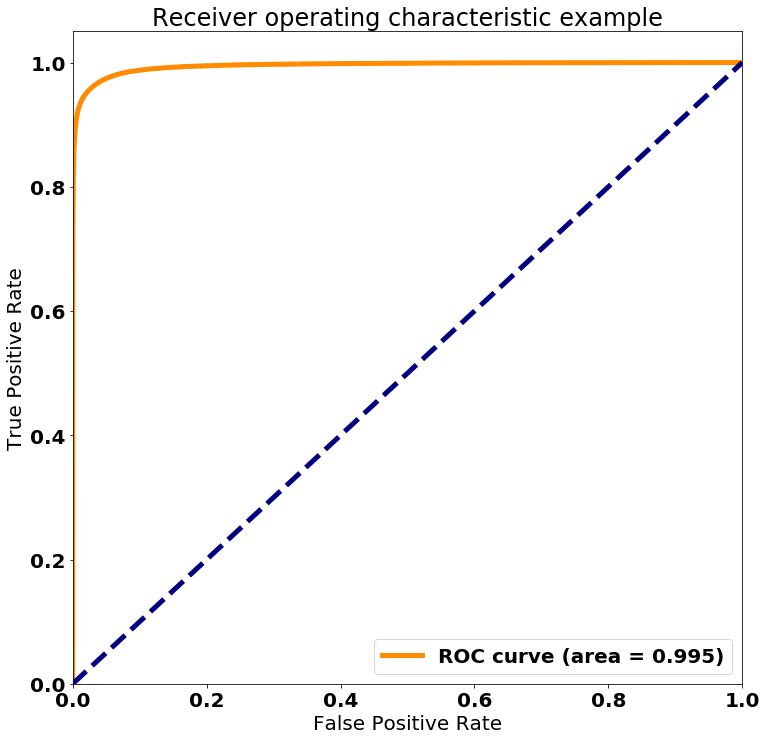

In [26]:
fpr, tpr, _ = roc_curve(y_val, y_pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(12, 12))
lw = 5
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

No handles with labels found to put in legend.
/home/vbelavin/home/anaconda3/envs/rootenv/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


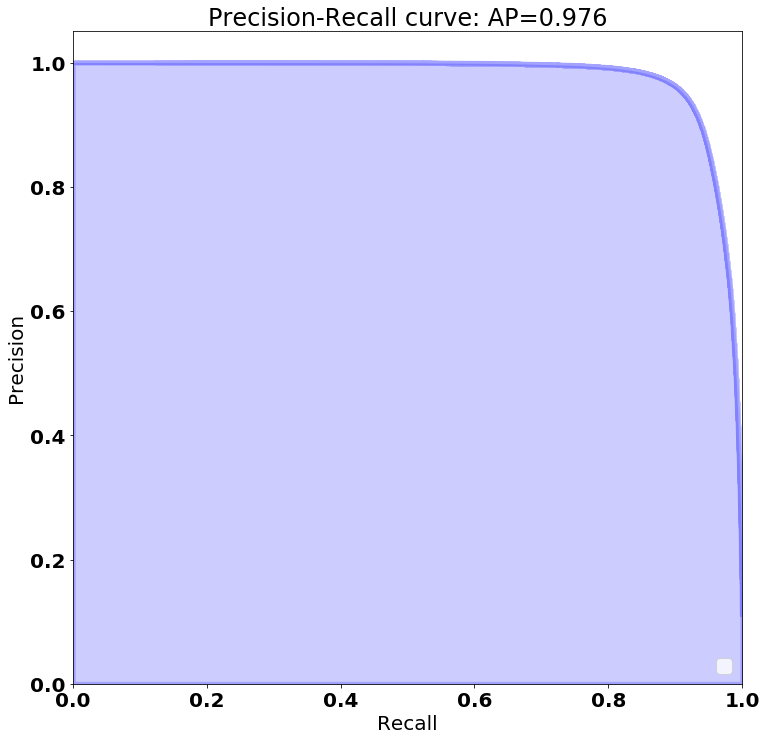

In [27]:
precision, recall, _ = precision_recall_curve(y_val, y_pred)


plt.figure(figsize=(12, 12))
plt.step(recall, precision, color='b', alpha=0.2, lw=lw, 
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,lw=lw,
                 color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.3f}'.format(
          average_precision_score(y_score=y_pred, y_true=y_val)))
plt.legend(loc="lower right")
plt.show()

In [15]:

from math import fabs
import numpy as np

In [113]:
p = 2
a = -0.027675695071718895
b = 329.35243750349764
c = 0.025951280466150847
d = -360.4722011973281
dz = 12949.21875
f = lambda x: (fabs(a*x + b)**p + fabs(c*x + d)**p)**(1/p) / dz

In [114]:
dz**(1/p)

113.79463410020703

In [115]:
%%time
integrate.quad(f, a=0, b=dz, epsabs=1e-3)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 67.7 µs


(246.96013847321774, 0.0005401574849025122)

In [101]:
integrate.romberg(f, a=0, b=dz, )

1.7533323478532687e-32

In [116]:
from math import exp
from math import sqrt, log, fabs
import scipy.integrate as integrate


def rms_integral_root_closed_py(basetrack_left, basetrack_right):
    EPS = 1e-6
    dz = basetrack_right['features']['SZ'] - basetrack_left['features']['SZ']
    dx = basetrack_left['features']['SX'] - (basetrack_right['features']['SX'] - basetrack_right['features']['TX'] * dz)
    dy = basetrack_left['features']['SY'] - (basetrack_right['features']['SY'] - basetrack_right['features']['TY'] * dz)
    dtx = (basetrack_left['features']['TX'] - basetrack_right['features']['TX'])
    dty = (basetrack_left['features']['TY'] - basetrack_right['features']['TY'])
    print(dx, dy, dtx, dty, dz)
    p = 2
    f = lambda x: (fabs(dtx*x + dx)**p + fabs(dty*x + dy)**p)**(1/p) / dz
    
    return integrate.quad(f, a=0, b=dz, epsabs=1e-3)

In [117]:
%%time
rms_integral_root_closed_py({'features': {'SX': -36056.53762817383,
   'SY': -39337.32986450195,
   'SZ': -32503452.1484375,
   'TX': 0.023328968383019552,
   'TY': -0.06414268597152377},
  'signal': 0},
{'features': {'SX': -35725.41952133179,
  'SY': -40143.50414276123,
  'SZ': -32490502.9296875,
  'TX': 0.05100466345473845,
  'TY': -0.09009396643767462},
 'signal': 0})

329.35243750349764 -360.4722011973281 -0.027675695071718895 0.025951280466150847 12949.21875
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 302 µs


(246.96013847321774, 0.0005401574849025122)